In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

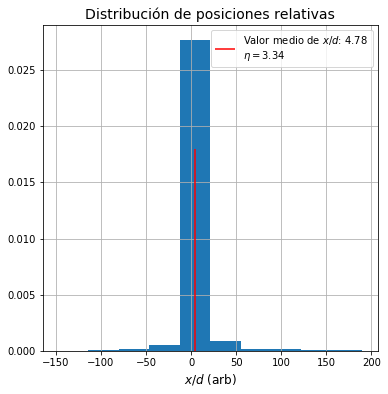

In [3]:
#Datos necesarios
N = 10000
h = 2
L = 1
A0 = 5
b0 = 1.5*A0

#Funciones a igualar
def expo(x,a0):
    return a0*np.exp(-(L/10)*x)

def hill(x,b0,A0):
    k = A0/2
    return b0-b0/(1+(x/k)**h)

def resolver(x,a0,b0,A0,d):
    return expo(x/d,a0)-hill(x/d,b0,A0)

#Encontrando el valor en el que son iguales las funciones
xrs = []

for i in range(N):
    d = np.random.normal(loc = L, scale = np.sqrt(L))
    a0 = np.random.normal(loc = A0, scale = np.sqrt(10*A0))
    xR = opt.fsolve(resolver,4,args=(a0,b0,A0,d))
    xrs.append(xR[0])
    
xrs = np.array(xrs)

#Cálculo de ruido
ruido = np.std(xrs)/np.mean(xrs)

plt.figure(figsize=(6,6))
plt.title("Distribución de posiciones relativas",fontsize=14)
plt.hist(xrs,density=True)
plt.vlines(np.mean(xrs),0,0.018,color="red",label="Valor medio de $x/d$: {:.2f} \n$\eta = {:.2f}$".format(np.mean(xrs),ruido))
plt.xlabel("$x/d$ (arb)",fontsize=12)
plt.grid(True)
plt.legend()
plt.savefig("posicionesrel.png")